# Комментарий от ревьюера

~~Наиль, добрый день! Меня зовут Влада. Ниже в файле ты найдешь мои комментарии: <font color='green'>зеленый цвет — «все отлично»; </font> <font color='blue'>синий — «хорошо, но можно лучше»; </font> <font color='red'>красный — «нужно исправить».</font> Комментарии в самом коде я отделяю знаками «###».~~

~~Наиль, спасибо! Осталась пара замечаний. Комментарии выделены цветом, как раньше.~~

Наиль, осталось всего одно мелкое замечание.

<font color='brown'>
    Добрый вечер, Влада!
Хочу сказать большое спасибо за твои развернутые комментарии. Первый раз такое в моём обучении на Практикуме - обычно были шаблонные сухие комментарии до этого :-)
</font>

Спасибо за отзыв!


# Обучение с учителем
# Прогнозирование ухода клиента из банка в ближайшее время
## Описание проекта
Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.  

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.  

Постройте модель с предельно большим значением F1-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте F1-меру на тестовой выборке самостоятельно.  

Дополнительно измеряйте AUC-ROC, сравнивайте её значение с F1-мерой.  

Источник данных: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

## Описание данных
Признаки
- **RowNumber** — индекс строки в данных
- **CustomerId** — уникальный идентификатор клиента
- **Surname** — фамилия
- **CreditScore** — кредитный рейтинг
- **Geography** — страна проживания
- **Gender** — пол
- **Age** — возраст
- **Tenure** — количество недвижимости у клиента
- **Balance** — баланс на счёте
- **NumOfProducts** — количество продуктов банка, используемых клиентом
- **HasCrCard** — наличие кредитной карты
- **IsActiveMember** — активность клиента
- **EstimatedSalary** — предполагаемая зарплата

Целевой признак
- **Exited** — факт ухода клиента

## Шаг 1. Загрузите и подготовьте данные. Поясните порядок действий.

In [1]:
# Импорт нужных библиотек и классов
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Разделение на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
import joblib
# Алгоритм классификации - решающее дерево
from sklearn.tree import DecisionTreeClassifier
# Алгоритм классификации - случайный лес
from sklearn.ensemble import RandomForestClassifier
# Алгоритм классификации - логистическая регрессия
from sklearn.linear_model import LogisticRegression
# Механизм GridSearchCV
from sklearn.model_selection import GridSearchCV
# Механизм StratifiedKFold
from sklearn.model_selection import StratifiedKFold
# Метрика F1
from sklearn.metrics import f1_score
# Метрика AUC-ROC
from sklearn.metrics import roc_auc_score
# Метрика "Точность"
from sklearn.metrics import precision_score
# Метрика "Полнота"
from sklearn.metrics import recall_score
# Инструмент перемешивания объектов
from sklearn.utils import shuffle
# Масштабирование
from sklearn.preprocessing import StandardScaler
# Библиотека imblearn
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [2]:
churn_df = pd.read_csv('churn.csv')

In [3]:
churn_df.info()
churn_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Из описания видно, что:
 1. Можно избавиться от столбца **RowNumber**, т.к. его значения содержатся в индексе.
 2. Можно избавиться от столбца **Surname**, т.к. он в нашей задаче не нужен.
 3. После замечания наставника понял, что можно также избавиться от **CustomerId**, т.к. он в нашей задаче не нужен.
 4. Переименовать столбцы в привычную нотацию
 5. Переименовать **Geography** => **country**, **HasCrCard** => **has_credit_card**, **IsActiveMember** => **is_active**, **NumOfProducts** => **product_count**, **Exited** => **is_exited**
 6. С помощью OHE-кодирования избавиться от столбцов **country** и **female**
 7. Убрать из рассмотрения строки, где **tenure** равен null, т.к. не совсем понятно как заполнить данный пропуск.

In [4]:
churn_df = churn_df.drop('RowNumber', axis=1)
churn_df = churn_df.drop('Surname', axis=1)
churn_df = churn_df.drop('CustomerId', axis=1)
churn_df.columns = ['credit_score', 'country', 'gender', 'age', 'tenure', 'balance', 'product_count', 'has_credit_card', 'is_active', 'estimated_salary', 'is_exited']
churn_df = pd.get_dummies(churn_df, drop_first=True)
churn_df = churn_df[~churn_df['tenure'].isnull()]

<font color='green'>Правильно, признаки RowNumber и Surname не информативны. </font> <font color='grey'>~~Какой еще признак не нужен для моделирования?~~ </font> <font color='green'>Да, CustomerId тоже лишний. </font>


<font color='green'>Кодирование категориальных признаков проведено корректно. 

Да, пропуски можно удалить.
</font>


In [5]:
churn_df.head()

,credit_score,age,tenure,balance,product_count,has_credit_card,is_active,estimated_salary,is_exited,country_Germany,country_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


<font color='grey'>~~Что насчет масштабирования числовых признаков?~~ </font>


<font color='grey'>~~Масштабирование следует проводить после деления выборки на части, так как scaler нужно настраивать (fit) только по обучающей выборке.~~ </font>


Масштабирование числовых признаков проведём позднее, после разбиения датафрейма на features и train.

## Шаг 2. Исследуйте баланс классов, обучите модель без учёта дисбаланса. Кратко опишите выводы.

In [6]:
churn_df_zeros = churn_df[churn_df['is_exited'] == 0]
churn_df_ones = churn_df[churn_df['is_exited'] == 1]
print('churn_df.shape = ', churn_df.shape)
print('churn_df_zeros.shape = ', churn_df_zeros.shape)
print('churn_df_ones.shape = ', churn_df_ones.shape)

churn_df.shape =  (9091, 12)
churn_df_zeros.shape =  (7237, 12)
churn_df_ones.shape =  (1854, 12)


<font color='green'>Верно, наблюдается дисбаланс. </font>


Видим, что объектов положительного класса примерно в 4 раза меньше, чем объектов отрицательного класса. Попробуем обучить модель без учёта дисбаланса классов.  

### Подготовка данных к обучению
Сначала выделим features и target признаки, а затем разделим исходные данные на обучающую, валидационную и тестовую выборки.

In [7]:
# Сначала выделим features и target признаки
features = churn_df.drop(['is_exited'], axis=1)
target = churn_df['is_exited']

Делить исходные данные будем в пропорциях: Обучающая выборка 60%, Валидационная 20% и Тестовая 20%
Для этого воспользуемся методом train_test_split из библиотеки sklearn. Она делит исходные данные на 2 части, следовательно применять её надо 2 раза.
Сначала поделим выделим тестовую выборку (20% от исх.), а потом из большего остатка (80% от исх.) выделим обучающую и валидационную выборки (по 75% и 25% от остатка соответственно).

In [8]:
features_comb, features_test, target_comb, target_test = train_test_split(features, target, test_size=0.2, random_state=12345)
features_train, features_valid, target_train, target_valid = train_test_split(features_comb, target_comb, test_size=0.25, random_state=12345)

<font color='red'>Признаки обучающей выборки хранятся в таблице features_train, scaler следует настраивать именно по ним (тестовые данные не должны принимать участия в настройке каких-либо параметров):

    scaler.fit(features_train[numeric])
    features_train[numeric] = scaler.transform(...)
    features_valid[numeric] = scaler.transform(...)
    features_test[numeric] = scaler.transform(...)
</font>


In [9]:
# Проведём масштабирование признаков credit_score, age, tenure, balance, product_count, estimated_salary.
numeric = ['credit_score', 'age', 'tenure', 'balance', 'product_count', 'estimated_salary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

<font color='green'>Деление выборки на части проведено корректно. Молодец, что задаешь random_state для воспроизводимости результатов. </font>


### Подбор гиперпараметров моделей
Попробуем подобрать оптимальные настройки моделей с помощью механизма GridSearchCV.

In [10]:
# Подбор параметра max_depth для модели решающего дерева
dtc = DecisionTreeClassifier(random_state=12345)
param_grid = { 
    'max_depth' : list(range(1, 10)),
}
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= k_fold, scoring = 'f1')
CV_dtc.fit(features_train, target_train)
print(CV_dtc.best_params_)
print(CV_dtc.best_score_)
print(CV_dtc.best_estimator_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: Undefined

{'max_depth': 7}
0.5650785113428274
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=12345, splitter='best')


<font color='green'>Хорошо, что задаешь оптимизируемую метрику в качестве параметра scoring, это правильно. </font>


In [11]:
# Подбор параметров n_estimators и max_depth для модели случайного леса
rfc = RandomForestClassifier(random_state=12345)
param_grid = { 
    'n_estimators': list(range(150, 201, 10)),
    'max_depth' : list(range(2, 17, 2)),
}
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= k_fold, scoring = 'f1')
# Операция занимает долгое время, поэтому следующие команды закоментированы по умолчанию
# (результат подбора: {'max_depth': 14, 'n_estimators': 190})
#CV_rfc.fit(features_train, target_train)
#print(CV_rfc.best_params_)
#print(CV_rfc.best_score_)
#print(CV_rfc.best_estimator_)

Таким образом, для модели решающего дерева самая лучшая максимальная глубина равна 7, а для модели случайного леса макс. глубина равна 14, кол-во деревьев - 190.

<font color='grey'>~~Параметр n_estimators для модели случайного леса можно перебирать с бОльшим шагом (10-50) и в бОльшем диапазоне значений (до 100-200), обычно качество с ростом n_estimators растет.~~ </font>


### Расчёт метрик F1 и AUC-ROC для найденных моделей решающего дерева и случайного леса, а также для логистической регрессии

In [12]:
# Модель решающего дерева
model = DecisionTreeClassifier(max_depth=7, random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('DecisionTreeClassifier model has f1 =', '%.3f'%f1, 'and auc_roc =', '%.3f'%auc_roc)

DecisionTreeClassifier model has f1 = 0.554 and auc_roc = 0.825


In [13]:
# Модель случайного леса
model = RandomForestClassifier(max_depth=14, n_estimators=190, random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('RandomForestClassifier model has f1 =', '%.3f'%f1, 'and auc_roc =', '%.3f'%auc_roc)

RandomForestClassifier model has f1 = 0.538 and auc_roc = 0.833


In [14]:
# Модель логистической регрессии
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
precision = precision_score(target_valid, predicted_valid)
recall = recall_score(target_valid, predicted_valid)
f1 = f1_score(target_valid, predicted_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('LogisticRegression model has f1 =', '%.3f'%f1, 'precision =', '%.3f'%precision, 'recall =', '%.3f'%recall, 'and auc_roc =', '%.3f'%auc_roc)

LogisticRegression model has f1 = 0.300 precision = 0.608 recall = 0.199 and auc_roc = 0.773


## Вывод
По метрике F1 лучше всех справилась модель решающего дерева. По метрике AUC-ROC лучше всех оказалась модель случайного леса. Но видим, что до 1 обеим метрикам ещё далеко.  
Логистическая регрессия вообще не смогла предсказать ни одного объекта с положительным классом и метрика F1 у нее практически равна 0.  

Попробуем улучшить модели за счёт балансировки классов.

<font color='green'>Отлично, все правильно. </font>


## Шаг 3. Улучшите качество модели, учитывая дисбаланс классов. Обучите разные модели и найдите лучшую. Кратко опишите выводы.

### Взвешивание классов
Начнём с технологии взвешивания классов, для этого в моделях надо указать параметр **class_weight='balanced'**.  
Сначала подберём гиперпараметры для моделей решающего дерева и случайного леса, а затем проверим обученные модели на валидационной выборке.

In [15]:
# Подбор параметра max_depth для модели решающего дерева
dtc = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
param_grid = { 
    'max_depth' : list(range(1, 10)),
}
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= k_fold, scoring = 'f1')
CV_dtc.fit(features_train, target_train)
print(CV_dtc.best_params_)
print(CV_dtc.best_score_)
print(CV_dtc.best_estimator_)

# Подбор параметров n_estimators и max_depth для модели случайного леса
rfc = RandomForestClassifier(random_state=12345, class_weight='balanced')
# Для скорости сразу зададим найденные варианты параметров, ниже закомментированные варианты подбора
#param_grid = { 
#    'n_estimators': list(range(10, 200, 40)),
#    'max_depth' : list(range(2, 17, 2)),
#}
param_grid = { 
    'n_estimators': [130],
    'max_depth' : [8],
}
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= k_fold, scoring = 'f1')
# Операция занимает долгое время, поэтому следующие команды закоментированы по умолчанию 
# (результат подбора: {'max_depth': 10, 'n_estimators': 90})
CV_rfc.fit(features_train, target_train)
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)
print(CV_rfc.best_estimator_)

{'max_depth': 6}
0.5766967522861198
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=12345, splitter='best')
{'max_depth': 8, 'n_estimators': 130}
0.6113944075560126
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=None, oob_score=False,
                       random_state=12345, verbose=0, warm_start=False)


In [16]:
# Модель решающего дерева
model = DecisionTreeClassifier(max_depth=6, random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
joblib.dump(model, 'dtr_model_bal.joblib')
print('DecisionTreeClassifier model has f1 =', '%.2f'%f1, 'and auc_roc =', '%.2f'%auc_roc)

# Модель случайного леса
model = RandomForestClassifier(max_depth=8, n_estimators=130, random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
joblib.dump(model, 'rfc_model_bal.joblib')
print('RandomForestClassifier model has f1 =', '%.2f'%f1, 'and auc_roc =', '%.2f'%auc_roc)

# Модель логистической регрессии
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
precision = precision_score(target_valid, predicted_valid)
recall = recall_score(target_valid, predicted_valid)
f1 = f1_score(target_valid, predicted_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
joblib.dump(model, 'lr_model_bal.joblib')
print('LogisticRegression model has f1 =', '%.2f'%f1, 'and auc_roc =', '%.2f'%auc_roc)

DecisionTreeClassifier model has f1 = 0.55 and auc_roc = 0.81
RandomForestClassifier model has f1 = 0.60 and auc_roc = 0.85
LogisticRegression model has f1 = 0.50 and auc_roc = 0.77


### Вывод
По метрикам F1 и AUC-ROC лучше всех справилась модель случайного леса, с ней мы достигли значения F1=0.60, которое немного больше, чем требовалось в задании проекта.  
Модель логистической регрессии улучшила свои показатели и теперь метрика F1 у неё равна 0.50, но она всё равно мала, поэтому в дальнейшем уберём её из рассмотрения.  
Попытаемся сделать наши модели ещё лучше за счёт увеличения выборки.

### Увеличение выборки
Т.к. объктов положительного класса примерно в 4 раза меньше, чем объектов отрицательного класса, то попробуем увеличить кол-во объектов положительного класса в 4 раза, и тогда должен наступить баланс классов.

In [17]:
# Функция увеличения выборки
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [18]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

<font color='green'>Upsampling проведен корректно. </font>


После красного замечания внизу, я изучил тему кроссвалидации на увеличенных выборках подробнее и решил воспользоваться механизмом библиотеки imblearn, которая сама разбивает и увеличивает выборки и помогает в подборе лучших гиперпараметров.

<font color='green'>Здорово, что нашел такую библиотеку, это интересно :) </font>


In [19]:
# Подбор параметра max_depth для модели решающего дерева
param_grid = { 
    'max_depth' : list(range(1, 11, 1)),
}
new_params = {'decisiontreeclassifier__' + key: param_grid[key] for key in param_grid}
k_fold = StratifiedKFold(n_splits=10, random_state=12345)
imba_pipeline = make_pipeline(SMOTE(random_state=12345), DecisionTreeClassifier(random_state=12345))

dtc_grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=k_fold, scoring='f1', return_train_score=True)

# (результат подбора: {'max_depth': 6})
dtc_grid_imba.fit(features_train, target_train);
joblib.dump(dtc_grid_imba, 'dtr_model_up.joblib')
print(dtc_grid_imba.best_params_)
print(dtc_grid_imba.best_score_)

# Подбор параметров n_estimators и max_depth для модели случайного леса
# Для скорости сразу зададим найденные варианты параметров, ниже закомментированные варианты подбора
#param_grid = { 
#    'n_estimators': list(range(200, 351, 50)),
#    'max_depth' : list(range(20, 30, 2)),
#}
param_grid = { 
    'n_estimators': [300],
    'max_depth' : [24],
}
new_params = {'randomforestclassifier__' + key: param_grid[key] for key in param_grid}
k_fold = StratifiedKFold(n_splits=10, random_state=12345)
imba_pipeline = make_pipeline(SMOTE(random_state=12345), RandomForestClassifier(n_estimators=100, random_state=12345))

rfc_grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=k_fold, scoring='f1', return_train_score=True)

# (результат подбора: {'max_depth': 24, 'n_estimators': 300})
rfc_grid_imba.fit(features_train, target_train);
joblib.dump(rfc_grid_imba, 'rfc_model_up.joblib')
print(rfc_grid_imba.best_params_)
print(rfc_grid_imba.best_score_)

{'decisiontreeclassifier__max_depth': 6}
0.5790343280731114
{'randomforestclassifier__max_depth': 24, 'randomforestclassifier__n_estimators': 300}
0.6164243968648514


<font color='grey'>~~Обычную кросс-валидацию на увеличенной с помощью upsampling (или уменьшенной с помощью downsampling) выборке проводить некорректно, так как применяя upsampling (downsampling), мы по сути меняем исходное распределение данных. А значит, некорректно измерять качество по таким данным, так как данные имеют распределение, отличное от исходного. Оценки будут смещенными.~~ 
    
~~Функцию для проведения кросс-валидации нужно написать самостоятельно: в ней, как обычно, выборку надо будет поделить на несколько частей, каждая часть по очереди будет становиться валидационной, а все остальные части – обучающей выборкой. Обучающую выборку каждый раз надо будет увеличивать с помощью upsampling (уменьшать с помощью downsampling), обучать на ней модель, а затем вычислять качество модели на валидационной выборке (валидационную выборку увеличивать/уменьшать не нужно).~~
    
~~Вариант попроще (но с более низким качеством, скорее всего) – использовать гиперпараметры, подобранные на шаге 2, а не подбирать их с помощью кросс-валидации.~~
 </font>


In [20]:
# Модель решающего дерева
model = joblib.load('dtr_model_up.joblib')
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('DecisionTreeClassifier model has f1 =', '%.2f'%f1, 'and auc_roc =', '%.2f'%auc_roc)

# Модель случайного леса
model = joblib.load('rfc_model_up.joblib')
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('RandomForestClassifier model has f1 =', '%.2f'%f1, 'and auc_roc =', '%.2f'%auc_roc)

DecisionTreeClassifier model has f1 = 0.56 and auc_roc = 0.81
RandomForestClassifier model has f1 = 0.60 and auc_roc = 0.84


### Вывод
Как видим увеличение выборки не помогло улучшить значение метрики F1. Попробуем воспользоваться уменьшением выборки.
### Уменьшение выборки
Т.к. объктов положительного класса примерно в 4 раза меньше, чем объектов отрицательного класса, то попробуем оставить одну четверть от объектов отрицательного класса, и тогда должен наступить баланс классов.

In [21]:
# Функция уменьшения выборки
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [22]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

<font color='green'>Downsampling проведен корректно. </font>


Как и в увеличении выборки попробуем воспользоваться механизмом библиотеки imblearn.

In [23]:
# Подбор параметра max_depth для модели решающего дерева
param_grid = { 
    'max_depth' : list(range(1, 11, 1)),
}
new_params = {'decisiontreeclassifier__' + key: param_grid[key] for key in param_grid}
k_fold = StratifiedKFold(n_splits=10, random_state=12345)
imba_pipeline = make_pipeline(RandomUnderSampler(sampling_strategy='not minority', random_state=12345), DecisionTreeClassifier(random_state=12345))

dtc_grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=k_fold, scoring='f1', return_train_score=True)

# (результат подбора: {'max_depth': 6})
dtc_grid_imba.fit(features_train, target_train);
joblib.dump(dtc_grid_imba, 'dtr_model_down.joblib')
print(dtc_grid_imba.best_params_)
print(dtc_grid_imba.best_score_)

# Подбор параметров n_estimators и max_depth для модели случайного леса
# Для скорости сразу зададим найденные варианты параметров, ниже закомментированные варианты подбора
#param_grid = { 
#    'n_estimators': list(range(50, 251, 50)),
#    'max_depth' : list(range(10, 30, 2)),
#}
param_grid = { 
    'n_estimators': [150],
    'max_depth' : [10],
}
new_params = {'randomforestclassifier__' + key: param_grid[key] for key in param_grid}
k_fold = StratifiedKFold(n_splits=10, random_state=12345)
imba_pipeline = make_pipeline(RandomUnderSampler(sampling_strategy='not minority', random_state=12345), RandomForestClassifier(n_estimators=100, random_state=12345))

rfc_grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=k_fold, scoring='f1', return_train_score=True)

# (результат подбора: {'max_depth': 10, 'n_estimators': 150})
rfc_grid_imba.fit(features_train, target_train);
joblib.dump(rfc_grid_imba, 'rfc_model_down.joblib')
print(rfc_grid_imba.best_params_)
print(rfc_grid_imba.best_score_)

{'decisiontreeclassifier__max_depth': 6}
0.5599258267177948
{'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 150}
0.5934327587960191


<font color='red'>~~Для downsampling стоит воспользоваться imblearn.under_sampling.~~ </font>


<font color='green'>Отлично! </font>


In [24]:
# Модель решающего дерева
model = joblib.load('dtr_model_down.joblib')
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('DecisionTreeClassifier model has f1 =', '%.2f'%f1, 'and auc_roc =', '%.2f'%auc_roc)

# Модель случайного леса
model = joblib.load('rfc_model_down.joblib')
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('RandomForestClassifier model has f1 =', '%.2f'%f1, 'and auc_roc =', '%.2f'%auc_roc)

DecisionTreeClassifier model has f1 = 0.54 and auc_roc = 0.81
RandomForestClassifier model has f1 = 0.58 and auc_roc = 0.85


### Вывод
Уменьшение выборки не привело к увеличению значения метрики F1 по сравнению с увеличением выборки и взвешиванием классов.  
Таким образом, получаем, что самая лучшая модель - это модель случайного леса, обученная на увеличенной выборке. Проведём финальное тестирование на тестовой выборке для всех 3 вариантов.

## Шаг 4. Проведите финальное тестирование.

<font color='grey'>~~Стоит добавить сводную таблицу с F1 и AUC на валидационной выборке для разных моделей и способов борьбы с дисбалансом.~~ </font>


In [25]:
scores_df = pd.DataFrame(columns=['model', 'f1_valid', 'auc_roc_valid', 'f1_test', 'auc_roc_test'])

def final_test(model_name, scores_df):
    model = joblib.load(model_name)
    predicted_valid = model.predict(features_valid)
    f1_valid = f1_score(target_valid, predicted_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc_valid = roc_auc_score(target_valid, probabilities_one_valid)
    
    predicted_test = model.predict(features_test)
    f1_test = f1_score(target_test, predicted_test)
    probabilities_test = model.predict_proba(features_test)
    probabilities_one_test = probabilities_test[:, 1]
    auc_roc_test = roc_auc_score(target_test, probabilities_one_test)
    scores_df.loc[len(scores_df)] = [model_name, f1_valid, auc_roc_valid, f1_test, auc_roc_test]

final_test('lr_model_bal.joblib', scores_df)
final_test('dtr_model_bal.joblib', scores_df)
final_test('dtr_model_up.joblib', scores_df)
final_test('dtr_model_down.joblib', scores_df)
final_test('rfc_model_bal.joblib', scores_df)
final_test('rfc_model_up.joblib', scores_df)
final_test('rfc_model_down.joblib', scores_df)
scores_df.sort_values(by=['f1_valid'], ascending=False)

,model,f1_valid,auc_roc_valid,f1_test,auc_roc_test
5,rfc_model_up.joblib,0.600924,0.840377,0.595308,0.852489
4,rfc_model_bal.joblib,0.597758,0.853146,0.604595,0.862413
6,rfc_model_down.joblib,0.577093,0.849111,0.588877,0.857286
2,dtr_model_up.joblib,0.556656,0.805604,0.559140,0.823155
1,dtr_model_bal.joblib,0.553326,0.810823,0.574173,0.827210
3,dtr_model_down.joblib,0.541152,0.810587,0.553236,0.830850
0,lr_model_bal.joblib,0.495069,0.774778,0.509232,0.788087


<font color='green'>Таблица наглядная, молодец! </font>


<font color='blue'>~~Добавь, пожалуйста, столбцы с качеством на валидационной выборке. Лучшую модель выбираем по качеству на валидации.~~ </font>


<font color='green'>Отлично, для итоговой модели требуемое качество достигнуто. </font>


Построим график зависимости F1 и AUC от параметров для модели случайного леса построенной с помощью взвешивания классов

In [26]:
model = DecisionTreeClassifier(max_depth=5, random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

params_scores_df = pd.DataFrame(columns=['max_depth', 'n_estimators', 'f1', 'auc_roc'])

for i in range(2, 11, 2):
    for estim in range(10, 150, 10):
        model = RandomForestClassifier(n_estimators=estim, max_depth=i, random_state=12345, class_weight='balanced')
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
        params_scores_df.loc[len(params_scores_df)] = [i, estim, f1, auc_roc]
        
print(params_scores_df)

    max_depth  n_estimators        f1   auc_roc
0         2.0          10.0  0.533601  0.819671
1         2.0          20.0  0.519588  0.811309
2         2.0          30.0  0.520921  0.815200
3         2.0          40.0  0.522388  0.824337
4         2.0          50.0  0.524377  0.821766
..        ...           ...       ...       ...
65       10.0         100.0  0.596343  0.848086
66       10.0         110.0  0.592068  0.847472
67       10.0         120.0  0.599156  0.847461
68       10.0         130.0  0.598601  0.847727
69       10.0         140.0  0.595506  0.848588

[70 rows x 4 columns]


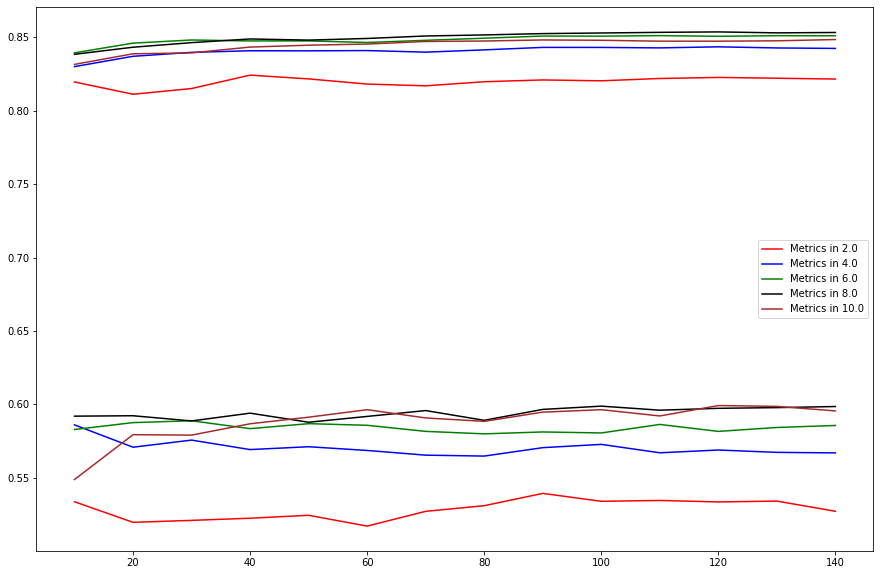

In [27]:
colors = ('red', 'blue', 'green', 'black', 'brown')
i = 0
fig, ax = plt.subplots(figsize=(15,10))
for key, grp in params_scores_df.groupby(['max_depth']): 
    ax.plot(grp['n_estimators'], grp['f1'], label = "Metrics in {0}".format(key), color=colors[i])
    ax.plot(grp['n_estimators'], grp['auc_roc'], color=colors[i])
    i += 1
plt.legend(loc='best')
plt.show()

Видим, что метрики F1 и AUC-ROC практически синхронно принимают значения при изменении гиперпараметров.

<font color='green'>Теперь на графике хорошо видны все результаты. </font>


<font color='blue'>~~Скачки связаны с изменением max_depth. Стоило при каждом фиксированном max_depth изобразить графики зависимости качества от n_estimators (кривые, соответствующие разным max_depth, можно выделить разными цветами, либо изобразить отдельные графики).~~ </font>

<font color='green'>В целом, да, изменения F1 и AUC происходят синхронно.  </font>


### Вывод
На тестовой выборке мы получили примерно одинаковые значения по метрикам F1 и AUC-ROC для моделей случайного леса, полученных с помощью взвешивания классов и с помощью увеличения выборки. Также в ходе выполнения проекта было замечено, что метрика AUC-ROC всегда превосходит метрику F1 примерно на одно и то же значение.

<font color='green'>Да, AUC превосходит F1. </font> <font color='grey'>~~Интересно понять, синхронно ли увеличиваются/уменьшаются F1 и AUC при изменении параметров. Можно изобразить график зависимости F1 и AUC от параметров для какой-нибудь из моделей.~~ </font>



<font color='green'>Когда данные не сбалансированы, для выбора модели предпочтительнее использовать F1-меру, чем AUC. AUC может давать неадекватные результаты в этом случае. Если хочется узнать подробнее, посмотри стр. 7-8 документа http://www.machinelearning.ru/wiki/images/1/1c/Sem06_metrics.pdf </font>


Спасибо за ссылку!

# Итоговый комментарий

Спасибо, ты провел отличное исследование, осталось немного его доработать. 